# Importing Libraries

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [52]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [19]:
!pip install opencv-python

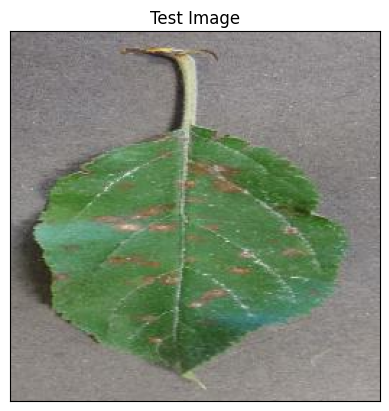

In [53]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [54]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


In [55]:
print(predictions)

[[2.52882298e-03 9.11500756e-05 6.88445270e-01 7.48738239e-05
  3.80744859e-05 7.00795725e-02 9.00582620e-07 3.67836468e-02
  1.22399933e-06 1.15060568e-04 2.86630348e-06 4.88767326e-02
  3.12204240e-04 7.32136323e-05 7.70988190e-05 1.67853199e-04
  3.75274718e-02 4.83164622e-04 1.49278855e-02 2.37915170e-04
  1.60782711e-05 6.13465207e-04 2.39415222e-05 8.13151710e-05
  1.55134182e-06 7.29662192e-04 9.18647740e-04 1.10557667e-05
  7.32263103e-02 1.69377662e-02 4.84325550e-03 1.00613723e-03
  4.27503895e-04 1.34061179e-06 1.29088032e-04 1.83118682e-04
  4.37375184e-06 2.63902592e-07]]


In [56]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


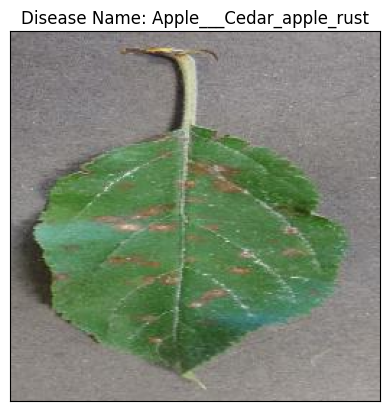

In [57]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()